In [1]:
import numpy as np
import pandas as pd
test = pd.read_csv(
    'data/ann-test.data', 
    sep="\s+",
    header=None,
    # names=columns
)

train = pd.read_csv(
    'data/ann-train.data', 
    sep="\s+",
    header=None,
    # names=columns
)
X = pd.concat([train, test])
y = X.iloc[:, -1]
X = X.drop(21, axis=1)

In [2]:
import seaborn as sns
sns.heatmap(X.iloc[:, [0, 16, 17, 18, 19, 20]].corr(), square=True)

In [3]:
X = X.values
y = y.values - 1 # algorithms below this line classify as 0, 1, 2

In [4]:
# multicolumns to 2 columns
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X = pca.fit_transform(X)
n_clusters = 3

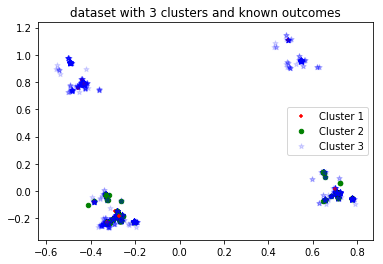

In [5]:
# actual distribution
import pylab as pl

for i in range(0, X.shape[0]):
    if y[i] == 0:
        c1 = pl.scatter(X[i,0], X[i,1],c='r', marker='+', s=10)
    elif y[i] == 1:
        c2 = pl.scatter(X[i,0], X[i,1],c='g', marker='o', s=20)
    elif y[i] == 2:
        c3 = pl.scatter(X[i,0], X[i,1],c='b', marker='*', s=30, alpha=0.15) # alpha to reduce density
pl.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Cluster 3'])
pl.title('dataset with 3 clusters and known outcomes')
pl.show()

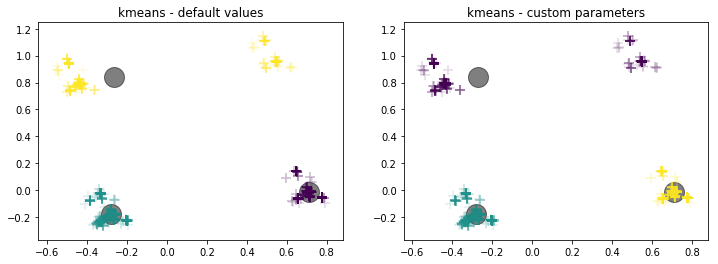

In [6]:
# kmeans 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=n_clusters, n_init=10, tol=0.5, max_iter=300, random_state=0)
k_means.fit(X)
y_pred = k_means.predict(X)
centers = k_means.cluster_centers_

k_means2 = KMeans(init='k-means++', n_clusters=n_clusters, n_init=25, tol=50, max_iter=600, random_state=0)
k_means2.fit(X)
y_pred2 = k_means2.predict(X)
centers2 = k_means2.cluster_centers_

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=400, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=100, marker="+", alpha=0.15)
plt.title("kmeans - default values")

plt.subplot(1, 2, 2)
plt.scatter(centers2[:, 0], centers2[:, 1], c='black', s=400, alpha=0.5);
plt.scatter(X[:, 0], X[:, 1], c=y_pred2, s=100, marker="+", alpha=0.15)
plt.title("kmeans - custom parameters")

plt.show()

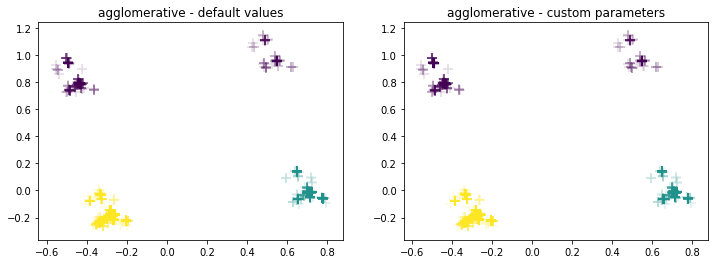

In [8]:
# agglomerative with ward
from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward').fit(X)
clustering2 = AgglomerativeClustering(n_clusters=n_clusters, affinity='manhattan', linkage='average').fit(X)

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=100, marker="+", alpha=0.15)
plt.title("agglomerative - default values")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clustering2.labels_, s=100, marker="+", alpha=0.15)
plt.title("agglomerative - custom parameters")

plt.show()

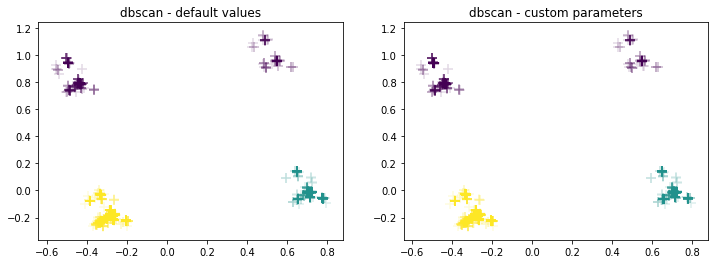

In [9]:
# dbscan
from sklearn.cluster import DBSCAN

clustering_db = DBSCAN(eps=5, min_samples=10, n_jobs=-1).fit(X)
clustering_db2 = DBSCAN(eps=50, min_samples=5, algorithm="kd_tree", p=2, n_jobs=-1).fit(X)


plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=clustering.labels_, s=100, marker="+", alpha=0.15)
plt.title("dbscan - default values")

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=clustering2.labels_, s=100, marker="+", alpha=0.15)
plt.title("dbscan - custom parameters")

plt.show()

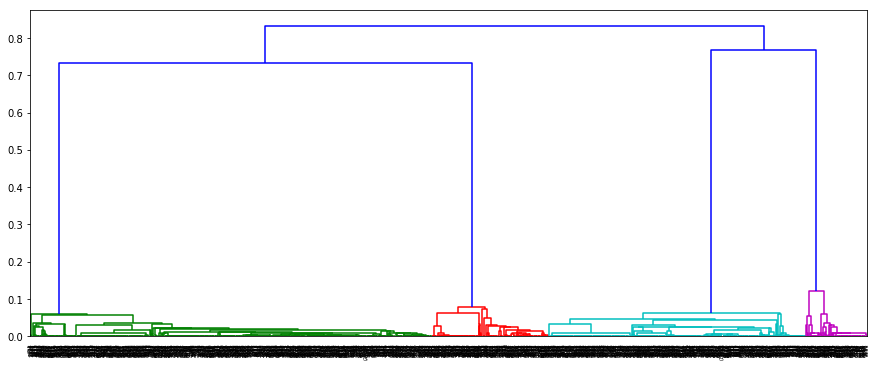

In [172]:
# dendrogram for agglomerative clustering
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

Z = hierarchy.linkage(X, 'single')
fig, axes = plt.subplots(1, 1, figsize=(15, 6))

dn = hierarchy.dendrogram(Z, truncate_mode="level")
hierarchy.set_link_color_palette(['m', 'c', 'y', 'k'])
hierarchy.set_link_color_palette(None)  # reset to default after use
plt.show()

In [19]:
# metrics for 2.2
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score

names = ["kmeans", "kmeans_custom", "agglo", "agglo_custom", "dbscn", "dbscn_custom"]
esimator_labels = [clustering.labels_, clustering2.labels_, clustering_db.labels_, clustering_db2.labels_, y_pred, y_pred2]

for i, lbls in enumerate(esimator_labels):
    nmi = normalized_mutual_info_score(y, lbls, average_method='arithmetic')
    ari = adjusted_rand_score(y, lbls)
    print(f"name: {names[i]} nmi: {nmi:.4f} ari: {ari:.4f}")

name: kmeans nmi: 0.0154 ari: -0.0306
name: kmeans_custom nmi: 0.0154 ari: -0.0306
name: agglo nmi: 0.0000 ari: 0.0000
name: agglo_custom nmi: 0.0000 ari: 0.0000
name: dbscn nmi: 0.0154 ari: -0.0306
name: dbscn_custom nmi: 0.0154 ari: -0.0306
